In [76]:
#Loading Data Tool Packages
import pandas as pd
import numpy as np

#Packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt

#Packages for datetime conversions
import time
from datetime import datetime as dt


In [77]:
data = pd.read_csv('QSAR_BCF_Kow.csv')

In [78]:
data.head()

,CAS,Name,SMILES,LogKOW,KOW type,logBCF
0,105-67-9,n.a.,Oc1ccc(cc1C)C,2.3,exp,1.18
1,108-39-4,n.a.,Oc1cccc(c1)C,1.96,exp,1.03
2,113136-77-9,n.a.,O=C(O)C2CC2(C(=O)Nc1ccc(cc1Cl)Cl),1.98,pred,-0.40
3,114311-32-9,n.a.,O=C(O)c2cc(cnc2(C1=NC(=O)C(N1)(C)C(C)C))COC,1.02,pred,-1.00
4,1689-84-5,n.a.,N#Cc1cc(c(O)c(c1)Br)Br,2.99,pred,0.84


In [79]:
data.dropna(subset=['LogKOW','logBCF'], how='all')

,CAS,Name,SMILES,LogKOW,KOW type,logBCF
0,105-67-9,n.a.,Oc1ccc(cc1C)C,2.3,exp,1.18
1,108-39-4,n.a.,Oc1cccc(c1)C,1.96,exp,1.03
2,113136-77-9,n.a.,O=C(O)C2CC2(C(=O)Nc1ccc(cc1Cl)Cl),1.98,pred,-0.40
3,114311-32-9,n.a.,O=C(O)c2cc(cnc2(C1=NC(=O)C(N1)(C)C(C)C))COC,1.02,pred,-1.00
4,1689-84-5,n.a.,N#Cc1cc(c(O)c(c1)Br)Br,2.99,pred,0.84
...,...,...,...,...,...,...
1053,V-Mey_NA_04,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(C)(C)C(C)C(C)C,6.46,pred,3.71
1054,V-Mey_NA_05,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(C)(C)CC(C)(C)C,6.51,pred,3.92
1055,V-Mey_NA_06,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...,8.21,pred,3.76
1056,V-Mey_NA_07,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...,9.14,pred,3.19


In [80]:
LogKOWString = data[data['LogKOW'] == 'Merged'].index
data.drop(LogKOWString, inplace=True)
data.head(5)

,CAS,Name,SMILES,LogKOW,KOW type,logBCF
0,105-67-9,n.a.,Oc1ccc(cc1C)C,2.3,exp,1.18
1,108-39-4,n.a.,Oc1cccc(c1)C,1.96,exp,1.03
2,113136-77-9,n.a.,O=C(O)C2CC2(C(=O)Nc1ccc(cc1Cl)Cl),1.98,pred,-0.40
3,114311-32-9,n.a.,O=C(O)c2cc(cnc2(C1=NC(=O)C(N1)(C)C(C)C))COC,1.02,pred,-1.00
4,1689-84-5,n.a.,N#Cc1cc(c(O)c(c1)Br)Br,2.99,pred,0.84


In [81]:
data['BCF'] = data['logBCF']
z = data['BCF']
data["BCF"] = 10 ** z

data['KOW'] = data['LogKOW']
#print(data['KOW'][195])
data['KOW'] = pd.to_numeric(data['KOW'] )
z = data['KOW']
data["KOW"] = 10 ** z

data.head(5)

,CAS,Name,SMILES,LogKOW,KOW type,logBCF,BCF,KOW
0,105-67-9,n.a.,Oc1ccc(cc1C)C,2.3,exp,1.18,15.135612,199.526231
1,108-39-4,n.a.,Oc1cccc(c1)C,1.96,exp,1.03,10.715193,91.201084
2,113136-77-9,n.a.,O=C(O)C2CC2(C(=O)Nc1ccc(cc1Cl)Cl),1.98,pred,-0.40,0.398107,95.499259
3,114311-32-9,n.a.,O=C(O)c2cc(cnc2(C1=NC(=O)C(N1)(C)C(C)C))COC,1.02,pred,-1.00,0.100000,10.471285
4,1689-84-5,n.a.,N#Cc1cc(c(O)c(c1)Br)Br,2.99,pred,0.84,6.918310,977.237221


In [82]:
print(data.dtypes)
#print(data[data['LogKOW'] < 4.5])
print(data.SMILES.isnull().sum(axis=0))

#print(data[type(data.SMILES) != str].index)
#print(data.SMILES.count('Chloro'))

CAS          object
Name         object
SMILES       object
LogKOW       object
KOW type     object
logBCF      float64
BCF         float64
KOW         float64
dtype: object
2


In [83]:
indexNames = data[data.SMILES.isnull()].index
data.drop(indexNames, inplace=True)
#data = data.drop(index=[194,400])

In [84]:
import re

In [85]:
 #list(set(str(data.SMILES)))

In [86]:
"""carbonyls = []
for text in data.SMILES:
    row += 1
    ccone = "O=C"
    cctwo = "C=O"
    ccthree = "C(=O)"
    if text == 'O=C(C1C(C1(C)C)/C=C(/C(F)(F)F)\Cl)OCc1cccc(c1C)c1ccccc1':
        carbonyls.append(1)
    else:
        occurrences = 0
        occurrences = str(text).count(ccone) + str(text).count(cctwo) + str(text).count(ccthree)
        #print(text,":",occurrences)
        carbonyls.append(occurrences)
data["carbonyls"] = carbonyls
"""


def chemicalbonds(array, nameofarray, data, column):
    storage = []
    for text in data[column]:
        #print(text)
        occurrences = 0
        for i in array:
            occurrences += str(text).count(i)
        #occurrences = str(text).count(ccone) + str(text).count(cctwo) + str(text).count(ccthree)
        #print(text,":",occurrences)
        storage.append(occurrences)
    data[nameofarray] = storage
    
carbonylsarray = ['O=C','C=O','C(=O)']
chemicalbonds(carbonylsarray, 'carbonyls', data, 'SMILES')

carbonsarray = ['C','c']
chemicalbonds(carbonsarray, 'carbons', data, 'SMILES')

nitrogenarray = ['N','n']
chemicalbonds(nitrogenarray,'nitrogen',data,'SMILES')

fluorinearray = ['F','f']
chemicalbonds(fluorinearray,'fluorine',data,'SMILES')

brominearray = ['Br','br']
chemicalbonds(brominearray,'bromine',data,'SMILES')

chlorinearray = ['Cl','cl']
chemicalbonds(chlorinearray,'chlorine',data,'SMILES')

sulfurarray = ['S','s']
chemicalbonds(sulfurarray,'sulfur',data,'SMILES')

iodinearray = ['I','i']
chemicalbonds(iodinearray,'iodine',data,'SMILES')

phosphorusarray = ['P','p']
chemicalbonds(phosphorusarray,'phosphorus',data,'SMILES')

print(data)
#print(data.SMILES[884], data.carbonyls[884])
#print(data.SMILES[1055])

               CAS  Name                                             SMILES  \
0         105-67-9  n.a.                                      Oc1ccc(cc1C)C   
1         108-39-4  n.a.                                       Oc1cccc(c1)C   
2      113136-77-9  n.a.                  O=C(O)C2CC2(C(=O)Nc1ccc(cc1Cl)Cl)   
3      114311-32-9  n.a.        O=C(O)c2cc(cnc2(C1=NC(=O)C(N1)(C)C(C)C))COC   
4        1689-84-5  n.a.                             N#Cc1cc(c(O)c(c1)Br)Br   
...            ...   ...                                                ...   
1053   V-Mey_NA_04  n.a.            FC(F)C(F)(F)Oc1ccc(cc1)C(C)(C)C(C)C(C)C   
1054   V-Mey_NA_05  n.a.            FC(F)C(F)(F)Oc1ccc(cc1)C(C)(C)CC(C)(C)C   
1055   V-Mey_NA_06  n.a.  FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...   
1056   V-Mey_NA_07  n.a.  FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...   
1057   V-Mey_NA_08  n.a.  FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...   

     LogKOW KOW type  logBCF          BCF          

#### LogKow is an parameter for predicting the distribution of a substance in various environmental compartments (water, soil, air, biota, etc) Substances with high logKow values tend to adsorb more readily to organic matter in soils or sediments because of their low affinity for water. Chemicals with very high logKow values (i.e, >4.5) may have the potential to bio-concentrate in living organisms which may be harmful.

#### n-octanol/water partition coefficient (Kow) used as a screening test for bio-accumulation. Assumption is the uptake of an organic substance is driven by its hydrophobicity. For organic substances with a logKow value below 4.5 it is assumed that the affinity for the lipids of an organism is insufficient to exceed the bio-accumulation criterion i.e. a BCF value of 2000.

In [87]:
print(data.columns)
data['LogKOW'] = data['LogKOW'].apply(float)
print("LogKow:\n\n",data.LogKOW.describe())
print("LogBCF\n\n",data.logBCF.describe())
print("KOW:\n\n",data.KOW.describe())
print("BCF\n\n",data.BCF.describe())

Index(['CAS', 'Name', 'SMILES', 'LogKOW', 'KOW type', 'logBCF', 'BCF', 'KOW',
       'carbonyls', 'carbons', 'nitrogen', 'fluorine', 'bromine', 'chlorine',
       'sulfur', 'iodine', 'phosphorus'],
      dtype='object')
LogKow:

 count    1054.000000
mean        3.860560
std         2.254376
min        -4.000000
25%         2.390000
50%         3.795000
75%         5.250000
max        18.350000
Name: LogKOW, dtype: float64
LogBCF

 count    1054.000000
mean        2.035560
std         1.356367
min        -1.700000
25%         0.912500
50%         2.000000
75%         3.020000
max         6.060000
Name: logBCF, dtype: float64
KOW:

 count    1.054000e+03
mean     2.124078e+15
std      6.895721e+16
min      1.000000e-04
25%      2.454709e+02
50%      6.237762e+03
75%      1.778279e+05
max      2.238721e+18
Name: KOW, dtype: float64
BCF

 count    1.054000e+03
mean     1.130631e+04
std      7.942657e+04
min      1.995262e-02
25%      8.175638e+00
50%      1.000000e+02
75%      1.047129e+0

##### Chemicals with very high logKow values (i.e, >4.5) are of greater concern because they may have the potential to bio-concentrate in living organisms.

##### For organic substances with a logKow value below 4.5 it is assumed that the affinity for the lipids of an organism is insufficient to exceed the bio-accumulation criterion i.e. a BCF value of 2000.

##### Adding Column data for LogKOW & BCF levels in seperate column with < 4.5 as safe and < 2000.0 safe for BCF.

In [88]:
logbioconc = []

for i in data['LogKOW']:
    if i < 4.5:
        logbioconc.append('Safe')
    elif i >= 4.5:
        logbioconc.append('Exceeding Limit')

BCFbioconc = []

for j in data['BCF']:
    if j < 2000.0:
        BCFbioconc.append('Safe')
    elif j >= 2000.0:
        BCFbioconc.append('Exceeding Limit')

data['logbioconc'] = logbioconc
data['BCFbioconc']  = BCFbioconc

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1057
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CAS         1054 non-null   object 
 1   Name        1054 non-null   object 
 2   SMILES      1054 non-null   object 
 3   LogKOW      1054 non-null   float64
 4   KOW type    1054 non-null   object 
 5   logBCF      1054 non-null   float64
 6   BCF         1054 non-null   float64
 7   KOW         1054 non-null   float64
 8   carbonyls   1054 non-null   int64  
 9   carbons     1054 non-null   int64  
 10  nitrogen    1054 non-null   int64  
 11  fluorine    1054 non-null   int64  
 12  bromine     1054 non-null   int64  
 13  chlorine    1054 non-null   int64  
 14  sulfur      1054 non-null   int64  
 15  iodine      1054 non-null   int64  
 16  phosphorus  1054 non-null   int64  
 17  logbioconc  1054 non-null   object 
 18  BCFbioconc  1054 non-null   object 
dtypes: float64(4), int64(9), ob

In [90]:
print("Chemical Name:\n", data['Name'].value_counts())
print("\n\nKOW Type:\n", data['KOW type'].value_counts())

Chemical Name:
 n.a.                                   540
Hentriacontafluorohexadecanoic acid      1
Trichloroacetic acid                     1
o-Toluenesulfonamide                     1
Bicyclo[4.3.0]nonane                     1
                                      ... 
Sec-Bumeton                              1
2,4-Dichloro-6-nitrophenol               1
2,4,6-Trimethyl-3-heptene                1
Benzanthrone                             1
Triallylphosphate                        1
Name: Name, Length: 515, dtype: int64


KOW Type:
 exp     654
pred    400
Name: KOW type, dtype: int64


#### Let's visual the relationship between the type of elements in the chain against BCF

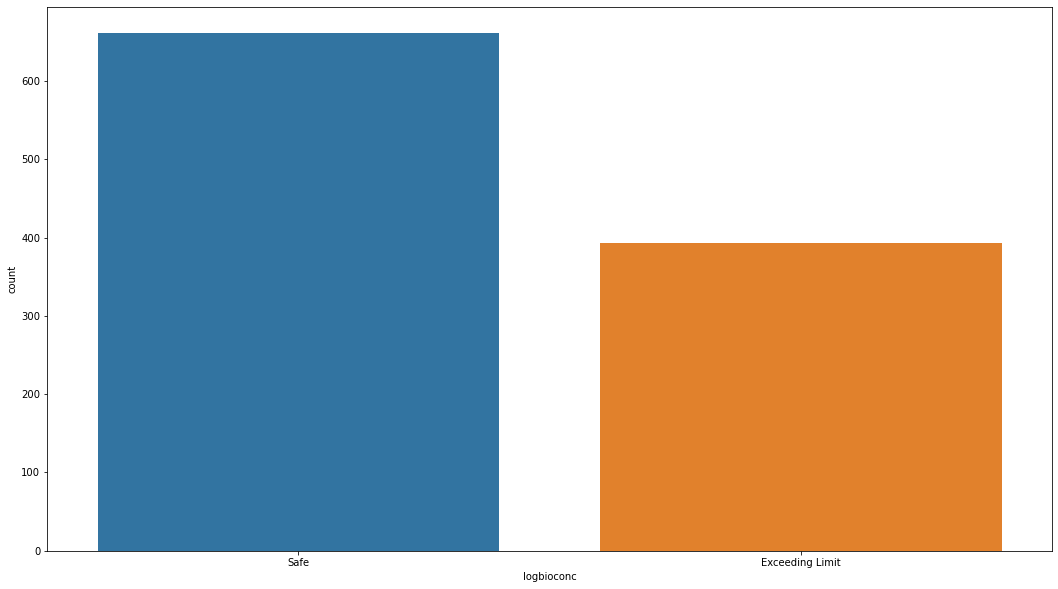

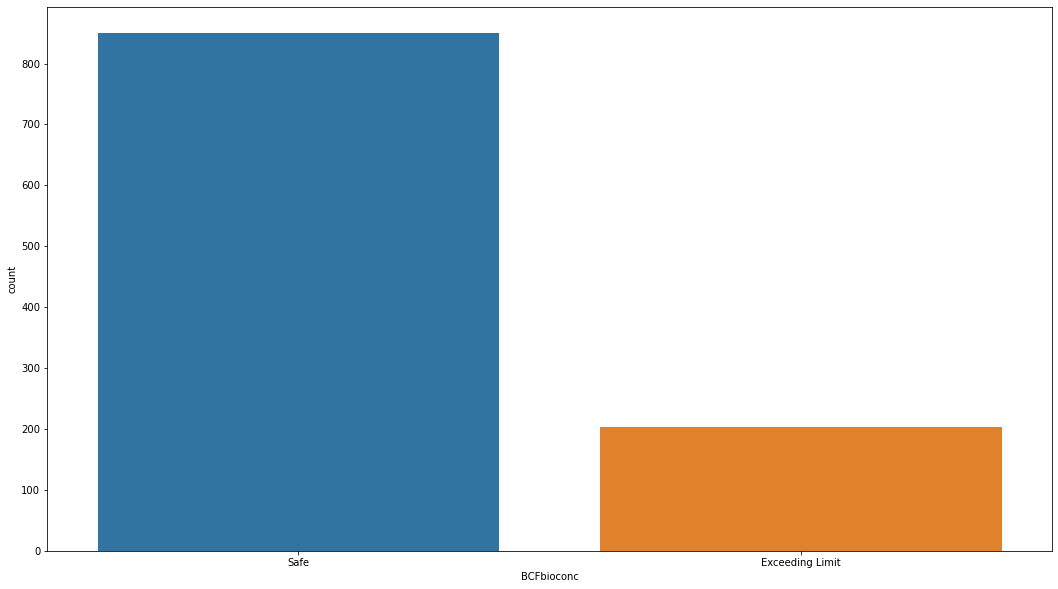

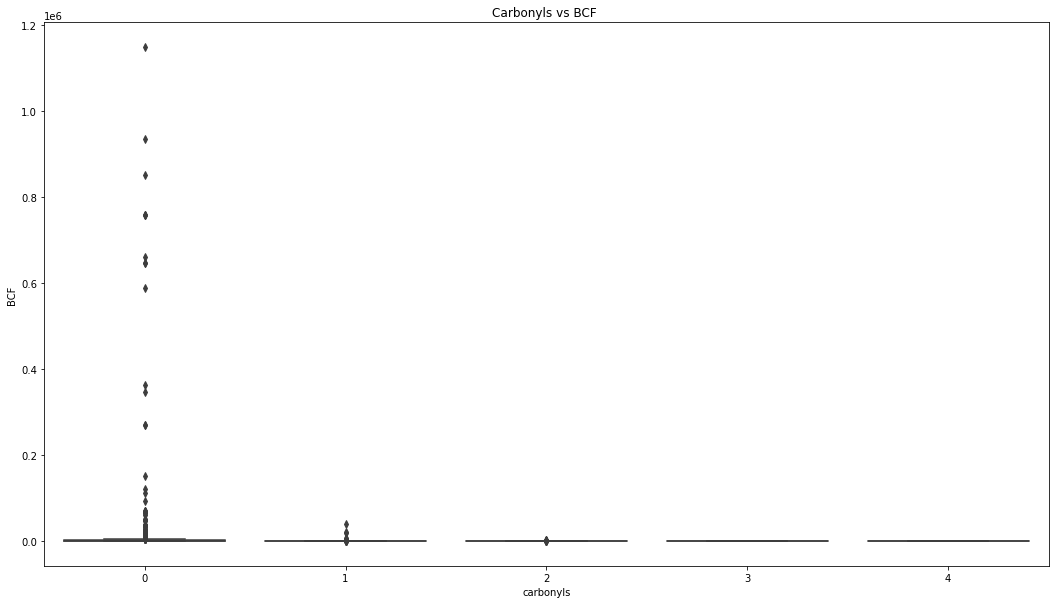

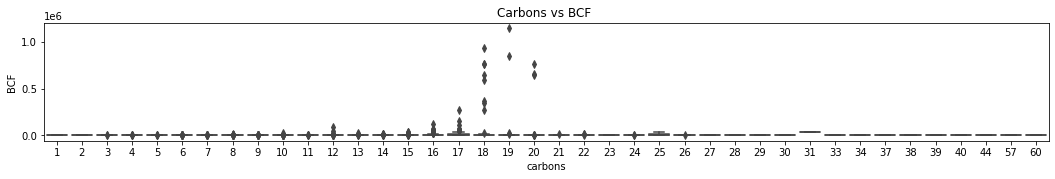

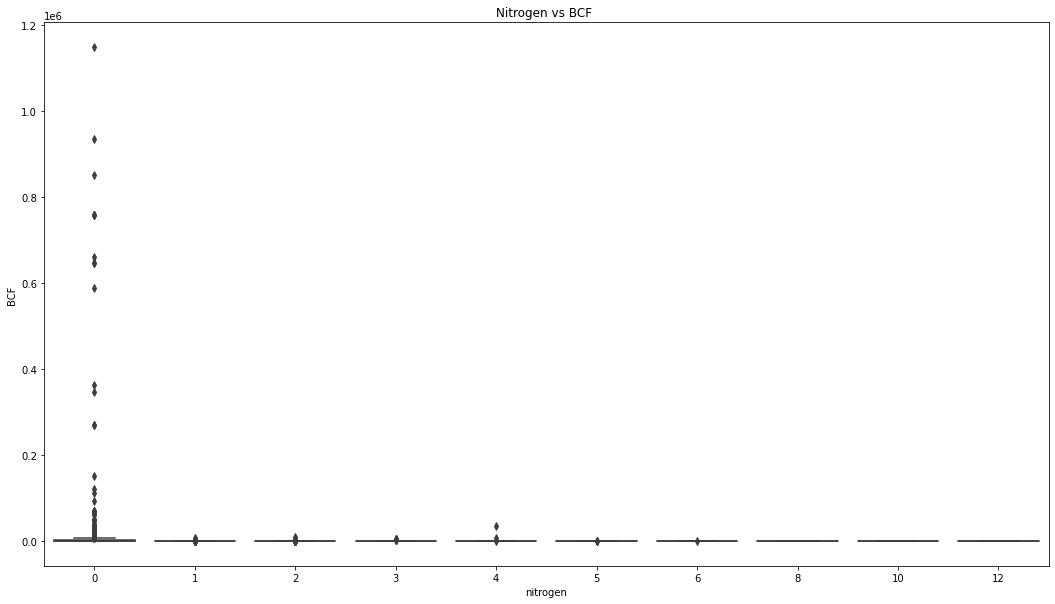

In [91]:
sns.countplot(data['logbioconc'])
plt.show()

sns.countplot(data['BCFbioconc'])
plt.show()

sns.boxplot(data['carbonyls'],data['BCF'])
plt.title("Carbonyls vs BCF ")
plt.show()

plt.subplot(4,1,1)
sns.boxplot(data['carbons'],data['BCF'])
plt.title("Carbons vs BCF ")
plt.show()

sns.boxplot(data['nitrogen'],data['BCF'])
plt.title("Nitrogen vs BCF ")
plt.show()

In [92]:
#plt.subplot(2,1,1)
#sns.stripplot(y='Log', x='LogKOW', data = data)
#plt.savefig('stripplot.png',dpi=400)

# Display the plot
#plt.show()

#sns.swarmplot(y='logBCF', x='LogKOW', data=data)
#plt.savefig('swarmplot.png', dpi=400)

##### Plotting a heatmap and seeing correlations between, Chlorine, Carbon, and LogBCF with LogKOW
##### LogBCF has a better correlation with Chlorine but has a lower account for BCF and Carbons

Text(0.5, 1.0, 'Correlation Among Features:')

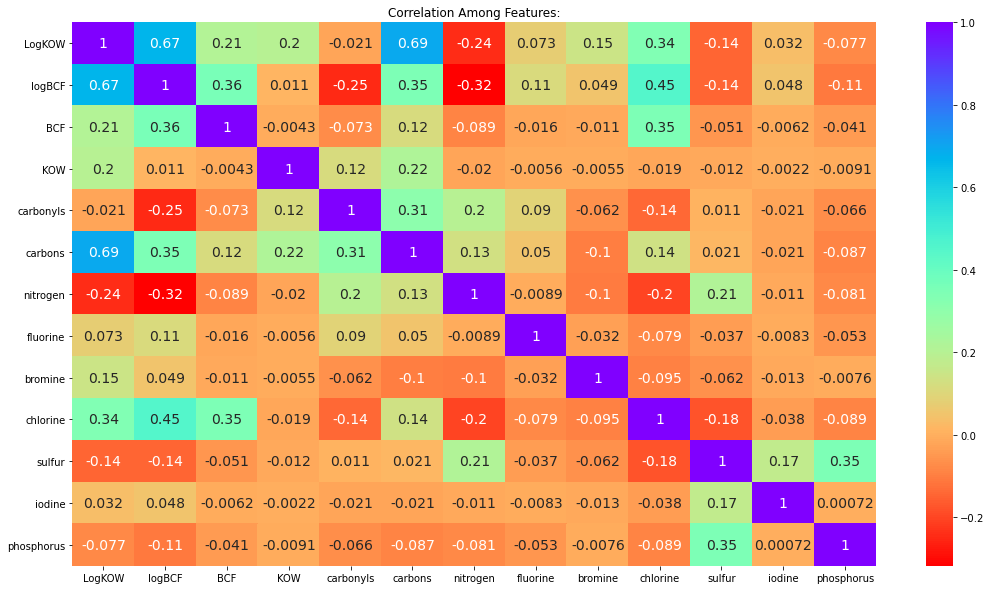

In [93]:
plt.rcParams['figure.figsize'] = (18, 10)
sns.heatmap(data.corr(), annot = True , cmap = 'rainbow_r', annot_kws = {"Size":14})
plt.title( "Correlation Among Features:")

## Importing, Splitting, and Preprocessing Data

### Setting up for Machine Learning

In [94]:
#Import modules for preprocessing:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#Import models from scikit learn module:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [95]:
#Splitting Data
traindata, testdata = train_test_split(data, test_size = 0.3)

#Grabbing Features and seperating from Predictions
datafortraining = traindata.iloc[:,3:]
datafortraining = datafortraining.drop(['KOW type','logbioconc','BCFbioconc'], axis = 1)
trainingKeys = datafortraining.columns

#Training and Testing Datasets
trainingX = traindata[trainingKeys]
trainingY = traindata['logbioconc']
testingX = testdata[trainingKeys]
testingY = testdata['logbioconc']

#Preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(trainingX)

## Machine Learning Models

### Using Logistic Regression, Support Vector Machine, Decision Tree Classifier, Random Forest Classifier Models by fitting data, making predictions, and judging accuracy

In [96]:
#Using LogisticRegression Model by fitting data, making predictions, and judging accuracy.
LR = LogisticRegression(max_iter=10000)
LR.fit(X_scaled,trainingY)
predictions = LR.predict(testingX)
accuracy = metrics.accuracy_score(predictions,testingY)
print("Logistic Regression Accuracy: ", accuracy)

Logistic Regression Accuracy:  0.33753943217665616


In [97]:
#Using SVM and its use of hyperplanes
SVM = svm.SVC()
SVM.fit(X_scaled,trainingY)
SVMpredictions = SVM.predict(testingX)
SVMaccuracy = metrics.accuracy_score(SVMpredictions, testingY)
print("SVM Accuracy: ",SVMaccuracy)

SVM Accuracy:  0.3249211356466877


In [98]:
#Decision Nodes
DTC = DecisionTreeClassifier()
DTC.fit(X_scaled,trainingY)
predictions = DTC.predict(testingX)
accuracy = metrics.accuracy_score(predictions,testingY)
print("Decision Tree Classifier Accuracy: ", accuracy)

Decision Tree Classifier Accuracy:  0.3785488958990536


In [99]:
RTC = RandomForestClassifier()
RTC.fit(X_scaled, trainingY)
predictions = RTC.predict(testingX)
accuracy = metrics.accuracy_score(predictions,testingY)
print("Decision Tree Classifier Accuracy: ", accuracy)

Decision Tree Classifier Accuracy:  0.3785488958990536


In [100]:
#Create a series with feature importances:
featureI = pd.Series(RTC.feature_importances_, index=trainingKeys).sort_values(ascending=False)
print(featureI)

LogKOW        0.609152
BCF           0.120694
logBCF        0.115083
carbons       0.094073
chlorine      0.022453
nitrogen      0.018699
sulfur        0.005905
fluorine      0.004535
carbonyls     0.003913
bromine       0.003283
phosphorus    0.001639
KOW           0.000434
iodine        0.000137
dtype: float64


In [101]:
badtrainingKeys = datafortraining.columns[3:]
testmodel = RandomForestClassifier()

#Preprocessing
badtrainingX = traindata[badtrainingKeys]
badtestingX = testdata[badtrainingKeys]
X_scaled = min_max_scaler.fit_transform(badtrainingX)

testmodel.fit(X_scaled, trainingY)
predictions = testmodel.predict(badtestingX)
accuracy = metrics.accuracy_score(predictions,testingY)
print("Bad Decision Tree Classifier Accuracy: ", accuracy)

Bad Decision Tree Classifier Accuracy:  0.3249211356466877


In [102]:
goodtrainingKeys = datafortraining.columns[:3]
testmodelgood = RandomForestClassifier()

#Preprocessing
goodtrainingX = traindata[goodtrainingKeys]
goodtestingX = testdata[goodtrainingKeys]
X_scaled = min_max_scaler.fit_transform(goodtrainingX)

testmodelgood.fit(X_scaled, trainingY)
predictions = testmodelgood.predict(goodtestingX)
accuracy = metrics.accuracy_score(predictions,testingY)
print("Bad Decision Tree Classifier Accuracy: ", accuracy)

Bad Decision Tree Classifier Accuracy:  0.3785488958990536


In [103]:
#Using our best SVM, let's see if predicting BCF is more feasible
SVM = svm.SVC()
trainingX = traindata[trainingKeys]
trainingY = traindata['BCFbioconc']

#Preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(trainingX)

SVM.fit(X_scaled,trainingY)
SVMpredictions = SVM.predict(testingX)
SVMaccuracy = metrics.accuracy_score(SVMpredictions, testingY)
print("SVM Accuracy: ",SVMaccuracy)

SVM Accuracy:  0.6750788643533123
